In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from utils.notebook import *
import ipywidgets as wx
import matplotlib.pyplot as plt
import ipywidgets as wx
from ipywidgets import interact
#plt.style.use('dark_background')

In [3]:
hf = read_hf_data()

In [5]:
hf.reset_index().datetime.describe()

count                   57555
unique                  22341
top       2018-11-09 18:50:00
freq                        9
first     2017-01-01 00:00:00
last      2019-01-17 22:45:00
Name: datetime, dtype: object

In [6]:
df = join()
count_cols = [col for col in df.columns if 'count' in col]
period_cols = [col for col in df.columns if 'period' in col]
inputt_cols = count_cols + period_cols

In [15]:
df.reset_index('carreira')#.resample('5t').mean()#[['count', 'bilhetes']].count()

carreira  bus_id   count  count_40  count_45  count_50  \
datetime                                                                     
2018-09-30 22:00:00        1     405     NaN       NaN       NaN       NaN   
2018-09-30 22:05:00        1     405     NaN       NaN       NaN       NaN   
2018-09-30 23:30:00        1     405     NaN       NaN       NaN       NaN   
2018-09-30 23:35:00        1     405     NaN       NaN       NaN       NaN   
2018-09-30 23:55:00        1     405     NaN       NaN       NaN       NaN   
2018-10-01 00:00:00        1     405     1.0       0.0       0.0       0.0   
2018-10-01 06:05:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 06:10:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 06:30:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 06:35:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 06:50:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 06:55:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 07:00:00        1     403   388.0       9.0      25.0      31.0   
2018-10-01 07:05:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 07:20:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 07:25:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 07:30:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 07:35:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 07:40:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 08:00:00        1     403  1308.0       2.0      15.0      33.0   
2018-10-01 08:05:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 08:10:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 08:15:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 08:30:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 08:35:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 08:40:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 08:45:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 09:05:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 09:10:00        1     403     NaN       NaN       NaN       NaN   
2018-10-01 09:15:00        1     403     NaN       NaN       NaN       NaN   
...                      ...     ...     ...       ...       ...       ...   
2019-01-16 20:55:00       ND     402     NaN       NaN       NaN       NaN   
2019-01-16 20:55:00       ND     407     NaN       NaN       NaN       NaN   
2019-01-16 21:00:00       ND     402     NaN       NaN       NaN       NaN   
2019-01-16 21:20:00       ND     402     NaN       NaN       NaN       NaN   
2019-01-16 21:20:00       ND     407     NaN       NaN       NaN       NaN   
2019-01-16 21:25:00       ND     407     NaN       NaN       NaN       NaN   
2019-01-16 21:30:00       ND     407     NaN       NaN       NaN       NaN   
2019-01-16 21:40:00       ND     402     NaN       NaN       NaN       NaN   
2019-01-16 21:45:00       ND     402     NaN       NaN       NaN       NaN   
2019-01-16 21:55:00       ND     402     NaN       NaN       NaN       NaN   
2019-01-16 22:05:00       ND     402     NaN       NaN       NaN       NaN   
2019-01-16 22:10:00       ND     402     NaN       NaN       NaN       NaN   
2019-01-16 22:15:00       ND     402     NaN       NaN       NaN       NaN   
2019-01-16 22:20:00       ND     402     NaN       NaN       NaN       NaN   
2019-01-16 22:25:00       ND     402     NaN       NaN       NaN       NaN   
2019-01-16 22:30:00       ND     402     NaN       NaN       NaN       NaN   
2019-01-16 22:40:00       ND     402     NaN       NaN       NaN       NaN   
2019-01-16 22:45:00       ND     402     NaN       NaN       NaN       NaN   
2019-01-16 23:00:00       ND     402     N

---

SELECT * FROM beanstalk.bus_hourly_count WHERE bus_id IN (401, 402, 403, 405, 407, 419);

In [4]:
df.reset_index().datetime.describe()

count                   10294
unique                   2066
top       2018-10-19 19:00:00
freq                       12
first     2017-01-01 00:00:00
last      2019-01-17 22:00:00
Name: datetime, dtype: object

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
model = DecisionTreeRegressor()
#model = RandomForestRegressor(1000)

default_input = ['count', 'count_55', 'count_70', 'count_75']
regressors = wx.SelectMultiple(options=inputt_cols, value=default_input)

dna = df.dropna().copy()
#dna = df[df['count'] <= 200].dropna().copy()
top_var = 'placeholder'

@interact(input_variables=regressors)
def train(input_variables):
    global model, top_var
    y = dna.bilhetes
    x = dna[list(input_variables)]
    model.fit(x, y)
    dna['pred'] = model.predict(x)
    print(r2_score(y, model.predict(x)))
    feature_importances = pd.DataFrame(
        index=list(input_variables),
        columns=['feature importance'],
        data=model.feature_importances_
    ).sort_values('feature importance', ascending=False).head()
    top_var = feature_importances.iloc[0].name
    return feature_importances

interactive(children=(SelectMultiple(description='input_variables', index=(0, 4, 7, 8), options=('count', 'cou…

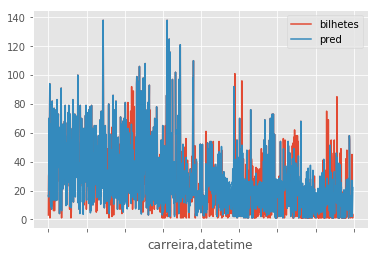

In [10]:
dna[['bilhetes', 'pred']].plot()

In [11]:
@interact(bus_line=dna.reset_index().carreira.unique())
def do(bus_line):
    ds = dna.loc[bus_line]
    r2 = r2_score(ds.bilhetes, model.predict(ds[list(regressors.value)]))
    print("[" + str(bus_line) + "] :: R2 -> " + str(round(r2, 3)) + " :: " + str(ds.shape[0]) + " samples")
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 4.8))
    ds[['bilhetes', 'pred']].plot(ax=axes[0])
    #ds.plot.scatter('pred', 'pred2', ax=axes[0])
    ds.plot.scatter('pred', 'bilhetes', ax=axes[1])
    #ds.plot.scatter('pred2', 'bilhetes', ax=axes[2])
    ds.plot.scatter(top_var, 'bilhetes', ax=axes[2])

interactive(children=(Dropdown(description='bus_line', options=(1, 2, 3, 4, 9, 10, 12, 13, 16, 20, 21, 24, 29,…

In [17]:
# meta
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, ShuffleSplit

# preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


x = dna[default_input]
y = dna['bilhetes']

pipeline = Pipeline(
    steps = [
        #('scaler', StandardScaler()),
        #('pca', PCA()),
        ('predictor', LinearRegression())
    ],
    memory=None  # optional caching
)

search_space = [
    #{'scaler': [StandardScaler()], 'scaler__with_mean': [True, False], 'scaler__with_std': [True, False]},
    #{'scaler': [MinMaxScaler()]},
    #{'pca': [PCA(2), PCA(3), PCA(4)]},
    {'predictor': [RandomForestRegressor(1000)] + [DecisionTreeRegressor()]}
]

shuffle_and_split = ShuffleSplit(
    n_splits=5,
    test_size=.1,
    random_state=123
)

gs = GridSearchCV(
    estimator=pipeline,
    param_grid=search_space,
    scoring='neg_mean_squared_error',
    cv=shuffle_and_split,
    n_jobs=4,
    iid=False,
    verbose=1
)

gs = gs.fit(x, y)
model = gs.best_estimator_  # best model (or Pipeline, in this case)
dna['pred'] = model.predict(x)
print(r2_score(dna['bilhetes'], dna['pred']))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    9.0s finished


0.7281271444659598


In [24]:
#pd.DataFrame(gs.cv_results_).transpose()
train = list(shuffle_and_split.split(x, y))[0][0]
test = list(shuffle_and_split.split(x, y))[0][1]

In [31]:
test

array([ 256,   42, 1502, 1454,  104, 1212,  120, 1298,   61,   31,  761,
       1431,  524,  554,  263, 1074, 1083,   50,  579,  103, 1180, 1270,
       1569,  408, 1342,  582, 1263,  810, 1220,  732,  907, 1235, 1306,
       1523, 1308,  489,  535,  336,  210, 1385,  841, 1412, 1542,  252,
       1366, 1461, 1157,  203, 1103,  320,   35, 1117, 1259,  839, 1571,
        297, 1301,  786, 1258, 1474,  249,  668, 1287,  566,  775, 1500,
       1333,  651,  182,   18, 1265, 1066,  385, 1491,  276,  229, 1205,
       1072, 1279,   28, 1123, 1320, 1446,  598, 1460,  925,  994,  735,
        637,  833,  226, 1427,  993,  594,  319,  147, 1141, 1512, 1011,
        624,  615,  930,  691, 1517, 1009, 1040,  599, 1528, 1056,  996,
        308,  499,  842,  733, 1437, 1039, 1445,  189, 1302, 1070,  824,
         13, 1410, 1227, 1207, 1198,  935, 1364, 1163, 1026,  167,   12,
       1479,  974, 1414,  870, 1532, 1029,  334,  196,  971,  129,  918,
        602, 1156, 1300,  472,  939, 1183, 1179, 10

In [12]:
gs.best_estimator_

Pipeline(memory=None,
     steps=[('predictor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [54]:
from sklearn import linear_model as linm
lin = linm.BayesianRidge()

pred = dna.pred.values.reshape(-1, 1)
bilhetes = dna.bilhetes.values.reshape(-1, 1)
lin.fit(pred, bilhetes)

dna['pred2'] = lin.predict(pred); pred2 = dna.pred2.values.reshape(-1, 1)

lin.score(pred2, bilhetes)

/home/bgalvao/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7182899087173504

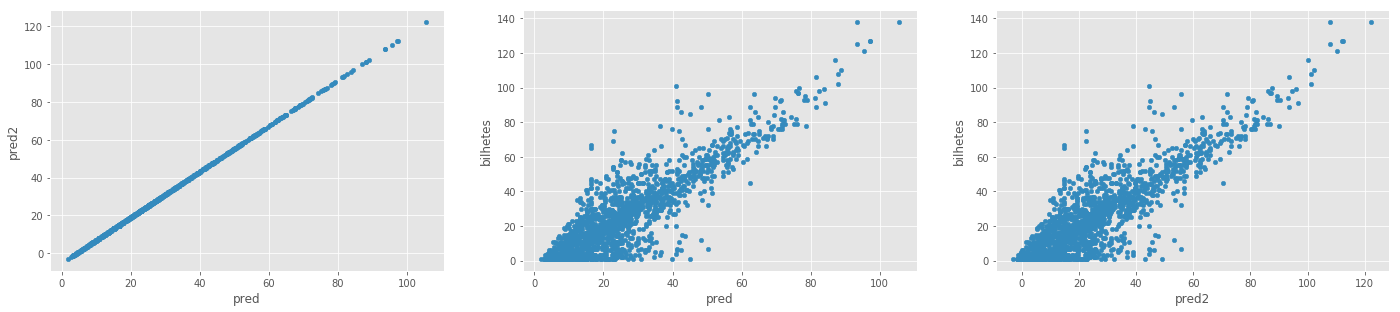

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 4.8))
dna.plot.scatter('pred', 'pred2', ax=axes[0])
dna.plot.scatter('pred', 'bilhetes', ax=axes[1])
dna.plot.scatter('pred2', 'bilhetes', ax=axes[2])

---
## pré-análise :: linha a linha

In [10]:
sdf = 'placeholder'
@interact(bus_line=(df.index.levels[0]), dropna=False)
def sth(bus_line, dropna):
    global sdf
    sdf = df.loc[bus_line]
    argmin = find_min(sdf.dropna(), on='rmse')
    if argmin is None:
        return 'cannot continue'
    print(sdf.dropna().shape, argmin)
    sdf = sdf[[argmin, 'bilhetes']].dropna() if dropna else sdf[[argmin, 'bilhetes']]
    
    sdf.plot(
        figsize=(12, 4.8),
        legend=['wifi', 'tickets'],
        alpha=.5
    )
    plt.xlabel('')
    plt.figure()
    (sdf[argmin] - sdf.bilhetes).plot(
        figsize=(12, 4.8),
        legend=False,
        alpha=.5,
        title='diff'
    )
    plt.figure()
    (sdf[argmin] / sdf.bilhetes).plot.hist(
        bins=60,
        figsize=(12, 4.8),
        legend=False,
        alpha=.5,
        title='ratio'
    )

interactive(children=(Dropdown(description='bus_line', options=(1, 2, 3, 4, 8, 9, 10, 12, 13, 14, 16, 20, 21, …

### bloco a bloco de linha escolhida acima

In [10]:
tdf = sdf.reset_index()
tdfs = np.split(tdf, tdf[tdf.isna().any(1)].index)
tdfs = [d.dropna().set_index('datetime') for d in tdfs]
tdfs = list(filter(lambda d: len(d) > 4, tdfs))
@interact(block=range(len(tdfs)))
def synos(block):
    tdfs[block].plot()
    plt.xlabel('')
    return tdfs[block].head()

interactive(children=(Dropdown(description='block', options=(0, 1), value=0), Output()), _dom_classes=('widget…